# Fruit Classification

### This notebook outlines the ML model using k-Nearest Neighbors algorithm. We will 
#### 1. Load data, Explore data
#### 2. Visualise the dataset
#### 3. Determine the number of neighbours
#### 4. Model training using model kNN
#### 5. Error and Accuracy calculation
#### 6. Ploting Error and Accuracy

In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Imporitng CSV file using pandas

df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


##### Exploring dataset

In [7]:
# Exploring dataset
fname = df['fruit_name']

fname

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

In [8]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


#### Data Visualisation

(array([19.,  0.,  0.,  5.,  0.,  0., 19.,  0.,  0., 16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

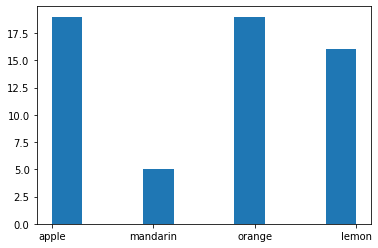

In [9]:
plt.hist(df.fruit_name)

##### Preparing data

In [10]:
x = df.iloc[: , [3, 4, 5, 6]].values
y = df.iloc[: , 1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)

(44, 4)


##### Model used kNN (Kohonen Nearest Neighbour)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

##### Talling/Verifying data after training of model using train dataset 

In [13]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [14]:
print(x_test)

[[362.     9.6    9.2    0.74]
 [150.     7.1    7.9    0.75]
 [194.     7.2   10.3    0.7 ]
 [140.     6.7    7.1    0.72]
 [172.     7.1    7.6    0.92]
 [176.     7.4    7.2    0.6 ]
 [142.     7.6    7.8    0.75]
 [216.     7.3   10.2    0.71]
 [154.     7.1    7.5    0.78]
 [140.     7.3    7.1    0.87]
 [ 84.     6.     4.6    0.79]
 [166.     6.9    7.3    0.93]
 [158.     7.1    7.5    0.79]
 [180.     7.6    8.2    0.79]
 [190.     7.5    8.1    0.74]]


##### Prediction using test dataset

In [15]:
model.predict(x_test)

array(['orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'lemon', 'apple', 'apple', 'apple',
       'apple'], dtype=object)

##### Checking the Error rate and Accuracy of model

In [16]:
error_rate = []
acc_score = []

for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    pred_i = clf.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    acc=clf.score(x_test,y_test)
    acc_score.append(acc)

#####  Plotting the Error and Accuracy

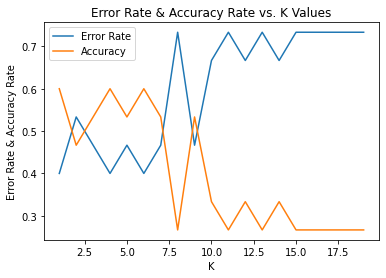

In [19]:
#Plot the error rate

plt.plot(range(1,20),error_rate, label='Error Rate')
plt.plot(range(1,20),acc_score, label='Accuracy')
plt.title("Error Rate & Accuracy Rate vs. K Values")
plt.xlabel('K')
plt.ylabel('Error Rate & Accuracy Rate')
plt.legend(loc='best')
plt.show()
